# Data Cleaning & Exploratory Data Analysis (EDA) - Purchase

This notebook aims to perform Data Cleaning and EDA on the Flipkart purchase data.

In [3]:
# import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# Load dataset
purchase_data = pd.read_csv('data/purchase_data.csv', index_col=0)

In [20]:
purchase_data.head()

,Unnamed: 0.1,Invoice ID,Name,Order Date,State,City,Categories,Subcategories,Ratings,Quantity,MRP,Final Price,GST%%,City_Tier,Discount%,Delivery Fee%,Brand,Sale,Covid
0,0,OD103719706054443200,G3M1R1,23-08-2015 00:00,Delhi,New Delhi,Home & Kitchen,Kitchen Appliances,4.1,1,1370.33,1545.0,18%,Tier_1,0,13,Nova,No,No
1,1,OD106420064045076000,G3M1R1,07-01-2016 00:00,Delhi,New Delhi,Health & Personal Care Appliances,Health Care,4.3,1,1164.76,1260.0,5%,Tier_1,0,9,Omron,No,No
2,2,OD106420064045076001,G3M1R1,07-01-2016 00:00,Delhi,New Delhi,Clothing and Accessories,Books,4.5,1,596.67,730.0,5%,Tier_1,0,23,Johnson,No,No
3,3,OD109711988579254000,G3M1R2,17-07-2017 00:00,Delhi,New Delhi,Exercise & Fitness,Fitness Accessories,4.3,1,199.00,199.0,18%,Tier_1,0,0,HAANS,No,No
4,4,OD109711988579254000,G3M1R2,18-07-2017 00:00,Delhi,New Delhi,Health Care,Health Supplements,4.1,1,4162.00,4162.0,28%,Tier_1,0,0,Muscletech,No,No


In [21]:
#Converting rder date column to datetime format
purchase_data = purchase_data.drop(purchase_data.columns[0:1], axis=1)
purchase_data['Order Date'] = pd.to_datetime(purchase_data['Order Date'])

In [22]:
purchase_data.shape

(3179, 18)

In [23]:
purchase_data.head()

,Invoice ID,Name,Order Date,State,City,Categories,Subcategories,Ratings,Quantity,MRP,Final Price,GST%%,City_Tier,Discount%,Delivery Fee%,Brand,Sale,Covid
0,OD103719706054443200,G3M1R1,2015-08-23,Delhi,New Delhi,Home & Kitchen,Kitchen Appliances,4.1,1,1370.33,1545.0,18%,Tier_1,0,13,Nova,No,No
1,OD106420064045076000,G3M1R1,2016-07-01,Delhi,New Delhi,Health & Personal Care Appliances,Health Care,4.3,1,1164.76,1260.0,5%,Tier_1,0,9,Omron,No,No
2,OD106420064045076001,G3M1R1,2016-07-01,Delhi,New Delhi,Clothing and Accessories,Books,4.5,1,596.67,730.0,5%,Tier_1,0,23,Johnson,No,No
3,OD109711988579254000,G3M1R2,2017-07-17,Delhi,New Delhi,Exercise & Fitness,Fitness Accessories,4.3,1,199.00,199.0,18%,Tier_1,0,0,HAANS,No,No
4,OD109711988579254000,G3M1R2,2017-07-18,Delhi,New Delhi,Health Care,Health Supplements,4.1,1,4162.00,4162.0,28%,Tier_1,0,0,Muscletech,No,No


In [24]:
purchase_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3179 entries, 0 to 3178
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice ID     3179 non-null   object        
 1   Name           3179 non-null   object        
 2   Order Date     3179 non-null   datetime64[ns]
 3   State          3179 non-null   object        
 4   City           3179 non-null   object        
 5   Categories     3179 non-null   object        
 6   Subcategories  3179 non-null   object        
 7   Ratings        3179 non-null   float64       
 8   Quantity       3179 non-null   int64         
 9   MRP            3179 non-null   float64       
 10  Final Price    3179 non-null   float64       
 11  GST%%          3179 non-null   object        
 12  City_Tier      3179 non-null   object        
 13  Discount%      3179 non-null   int64         
 14  Delivery Fee%  3179 non-null   int64         
 15  Brand          3161 n

# Data Cleaning

### Drop duplicated rows

In [25]:
purchase_data.duplicated().sum()

13

In [26]:
#dropping duplicate values
purchase_data.drop_duplicates(inplace=True)

In [27]:
purchase_data.shape

(3166, 18)

### Check for null values

In [31]:
purchase_data.isnull().sum()

Invoice ID       0
Name             0
Order Date       0
State            0
City             0
Categories       0
Subcategories    0
Ratings          0
Quantity         0
MRP              0
Final Price      0
GST%%            0
City_Tier        0
Discount%        0
Delivery Fee%    0
Brand            0
Sale             0
Covid            0
dtype: int64

In [29]:
purchase_data.dropna(subset=['Brand'], inplace=True)

## Tackling Mismatched Invoice ID and Other Variables

In [32]:
# Geting unique Invoice IDs
unique_invoice_ids = list(purchase_data['Invoice ID'].unique())
len(unique_invoice_ids)

2745

In [33]:
def get_mismatched_invoice_ids(col_name):
  mismatch_invoice_ids = []

  global purchase_data, unique_invoice_ids

  for invoice_id in unique_invoice_ids:
    rows = purchase_data[purchase_data['Invoice ID']==invoice_id].drop_duplicates(subset=['Invoice ID', col_name])
    if rows.shape[0] > 1:
      mismatch_invoice_ids.append(invoice_id)

  return mismatch_invoice_ids

### Option 1: Drop all mismatched rows (selected)

In [34]:
mismatch_name_invoice_ids = get_mismatched_invoice_ids('Name')
mismatch_date_invoice_ids = get_mismatched_invoice_ids('Order Date')
mismatch_state_invoice_ids = get_mismatched_invoice_ids('State')
mismatch_city_invoice_ids = get_mismatched_invoice_ids('City')

In [35]:
mismatch_invoice_id = list(set(mismatch_name_invoice_ids + mismatch_date_invoice_ids + mismatch_state_invoice_ids + mismatch_city_invoice_ids))

In [36]:
len(mismatch_invoice_id)

64

In [37]:
mismatch_purchase_data = purchase_data[purchase_data['Invoice ID'].isin(mismatch_invoice_id)]
mismatch_purchase_data.shape

(171, 18)

In [38]:
purchase_data = purchase_data[~purchase_data['Invoice ID'].isin(mismatch_invoice_id)]
purchase_data.shape

(2977, 18)

#### Update time-related columns

In [39]:
# Drop time-related columns
purchase_data.drop(columns=['Covid', 'Sale', 'City_Tier'], inplace=True)

##### Covid

In [40]:
def covid_or_not(df,start_date,end_date,wave):
    df.loc[(df['Order Date']>start_date)  & (df['Order Date']<=end_date),'Covid'] = wave
    df['Order Date'] = pd.to_datetime(df['Order Date'])
    return df

purchase_data['Covid'] = 'No'
purchase_data = covid_or_not(purchase_data,'2020-04-01','2020-10-30','1st Wave')
purchase_data = covid_or_not(purchase_data,'2021-03-20','2021-06-03','2nd Wave')

In [41]:
purchase_data['Covid'].value_counts()

No          1835
1st Wave     809
2nd Wave     333
Name: Covid, dtype: int64

##### City Tier

In [42]:
tier_1 = ['Delhi','Pune','Ahmedabad','Bengaluru','Chennai','Hyderabad','Kolkata','Mumbai']
tier_2 = ['Agra','Ajmer','Aligarh','Amravati','Amritsar','Asansol','Aurangabad','Bareilly','Belgaum','Bhavnagar','Bhiwandi','Bhopal','Bhubaneswar',
'Bikaner','Bilaspur','Bokaro Steel City','Chandigarh','Coimbatore','Cuttack','Dehradun','Dhanbad','Bhilai','Durgapur','Erode','Faridabad',
'Firozabad','Ghaziabad','Gorakhpur','Gulbarga','Guntur','Gwalior','Gurugram','Guwahati','Hamirpur','Hubli–Dharwad','Indore','Jabalpur',
'Jaipur','Jalandhar','Jalgaon','Jammu','Jamnagar','Jamshedpur','Jhansi','Jodhpur','Navi Mumbai ','Kakinada','Kannur','Kanpur','Karnal',
'Kochi','Kolhapur','Kollam','Kozhikode','Kurnool','Ludhiana','Lucknow','Madurai','Malappuram','Mathura','Mangalore','Meerut','Moradabad',
'Mysore','Nagpur','Nanded','Nashik','Nellore','Navi Mumbai','Noida','Patna','Puducherry','Purulia','Prayagraj','Raipur','Rajkot','Rajamahendravaram',
'Ranchi','Rourkela','Ratlam','Salem','Sangli','Shimla','Siliguri','Solapur','Srinagar','Surat','Thanjavur','Thiruvananthapuram','Thrissur',
'Tiruchirappalli','Tirunelveli','Tiruvannamalai','Ujjain','Vijayapura','Vadodara','Varanasi','Vasai-Virar City','Vijayawada','Visakhapatnam','Vellore Andhra Pradesh']

In [43]:
purchase_data['City Tier'] = 'Tier 3'

for i in tier_1:
    purchase_data.loc[purchase_data['State']==i,'City Tier'] = 'Tier 1'
for i in tier_1:
    purchase_data.loc[purchase_data['City']==i,'City Tier'] = 'Tier 1'
    
for i in tier_2:
    purchase_data.loc[purchase_data['City']==i,'City Tier'] = 'Tier 2'

In [44]:
purchase_data['City Tier'].value_counts()

Tier 2    1097
Tier 3    1067
Tier 1     813
Name: City Tier, dtype: int64

## Rename GST% column

In [45]:
# Rename column
purchase_data.rename(columns={"GST%%": "GST%"}, inplace=True)

## Remove 2011 rows

In [46]:
purchase_data = purchase_data[purchase_data['Order Date'] >= '2012-01-01']

## Export

In [47]:
purchase_data.shape

(2955, 17)

In [48]:
# # Save to CSV
purchase_data.to_csv('Data/purchase_clean.csv', index=False)

# Exploratory Data Analysis (EDA)

In [4]:
# Load clean CSV file
purchase_data = pd.read_csv('data/purchase_clean.csv')
purchase_data['Order Date'] = pd.to_datetime(purchase_data['Order Date'])

In [5]:
purchase_data.head()

,Invoice ID,Name,Order Date,State,City,Categories,Subcategories,Ratings,Quantity,MRP,Final Price,GST%,Discount%,Delivery Fee%,Brand,Covid,City Tier
0,OD103719706054443200,G3M1R1,2015-08-23,Delhi,New Delhi,Home & Kitchen,Kitchen Appliances,4.1,1,1370.33,1545.0,18%,0,13,Nova,No,Tier 1
1,OD106420064045076000,G3M1R1,2016-07-01,Delhi,New Delhi,Health & Personal Care Appliances,Health Care,4.3,1,1164.76,1260.0,5%,0,9,Omron,No,Tier 1
2,OD106420064045076001,G3M1R1,2016-07-01,Delhi,New Delhi,Clothing and Accessories,Books,4.5,1,596.67,730.0,5%,0,23,Johnson,No,Tier 1
3,OD110363877142631000,G3M1R3,2017-09-30,Delhi,New Delhi,Home Decor,Wall Decor Items,3.5,1,209.00,209.0,12%,0,0,Bexton,No,Tier 1
4,OD110510509516810000,G3M1R3,2017-10-17,Delhi,New Delhi,Exercise & Fitness,Yoga,4.7,1,696.00,626.0,28%,11,0,Proline,No,Tier 1


## Visualisations

### Purchase Volume across time
Based on the number of Invoices

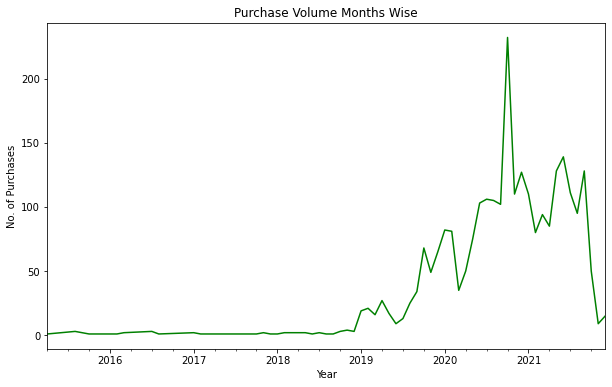

In [33]:
#Purchase volumen per month
purchase_data['Order Month'] = purchase_data['Order Date'].dt.to_period('M') 
s = purchase_data.drop_duplicates(subset=['Invoice ID'])['Order Month'].value_counts().sort_index()
plt.figure(figsize=(10,6))
s.plot(color='green')
plt.title('Purchase Volume Months Wise')
plt.xlabel('Year')
plt.ylabel('No. of Purchases')
plt.show()

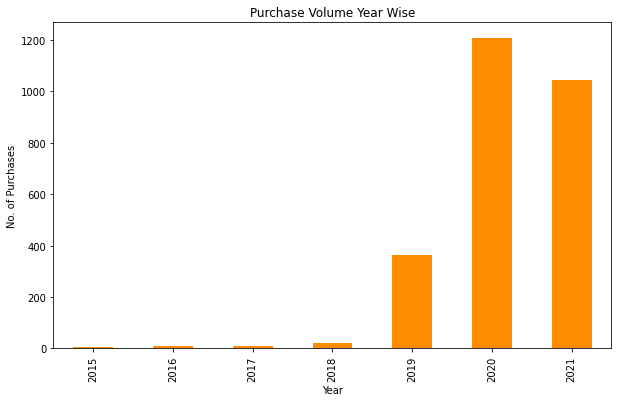

In [34]:
#purchase volume per year
purchase_data['Order Year'] = purchase_data['Order Date'].dt.to_period('Y') 
s = purchase_data.drop_duplicates(subset=['Invoice ID'])['Order Year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
s.plot.bar(color='darkorange')
plt.title('Purchase Volume Year Wise')
plt.xlabel('Year')
plt.ylabel('No. of Purchases')
plt.show()

### No. of Items Purchased in each Invoice

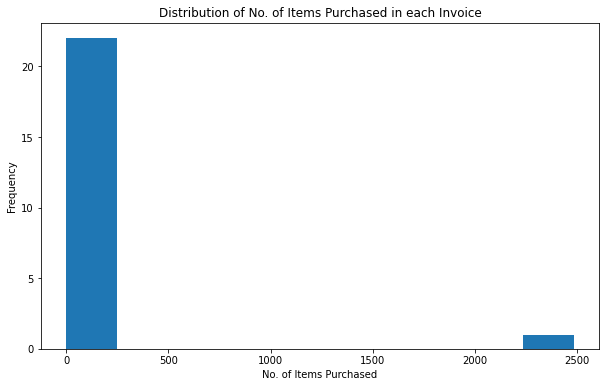

In [36]:
s = purchase_data.groupby('Invoice ID').sum()['Quantity'].value_counts().sort_index()
plt.figure(figsize=(10,6))
s.plot.hist(color='darkorange')
plt.title('Distribution of No. of Items Purchased in each Invoice')
plt.xlabel('No. of Items Purchased')
plt.ylabel('Frequency')
plt.show()

In [60]:
purchase_data['Invoice ID'].value_counts()

FAE03O2100113149        19
FABYDW2102125989        16
FABYDW2200282886        14
FABYDW2200589707        14
OD121851878113002000    13
                        ..
OD121466343614848000     1
OD120196451943972000     1
FABZZQ2000224829         1
FABZDC2101925166         1
FACY382100000173         1
Name: Invoice ID, Length: 2659, dtype: int64

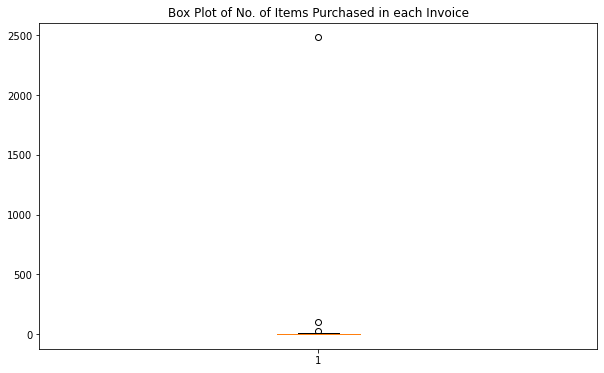

In [10]:
quant_item = purchase_data.groupby('Invoice ID').sum()['Quantity'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.boxplot(quant_item)
plt.title('Box Plot of No. of Items Purchased in each Invoice')
plt.show()

### Distribution of Final Price across Invoices

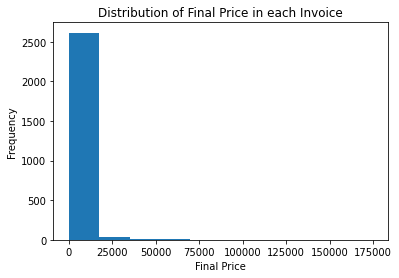

In [ ]:
fp_inv = purchase_data.drop_duplicates('Invoice ID')['Final Price']
plt.figure(figsize=(10,6))
fp_inv.plot.hist(color='darkorange')
plt.title('Distribution of Final Price in each Invoice')
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.show()

### Top 10 Categories for Items Purchased
Based on the sum of all quantities

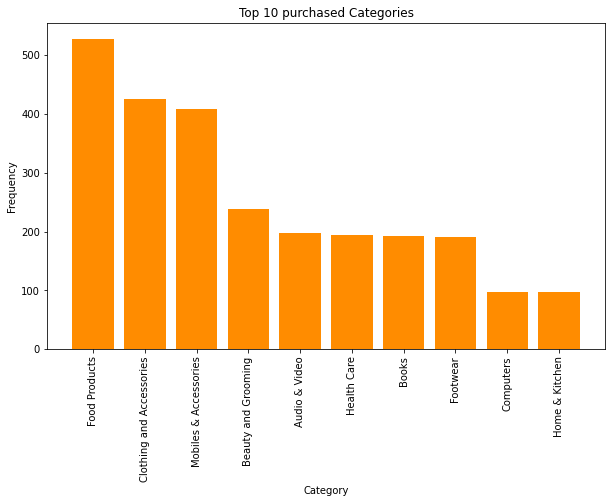

In [83]:
quant= purchase_data.groupby('Categories').sum()['Quantity']
quant = quant.nlargest(10)
plt.figure(figsize=(10,6))
plt.bar(quant.index, quant.values, color='darkorange')
plt.title('Top 10 purchased Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

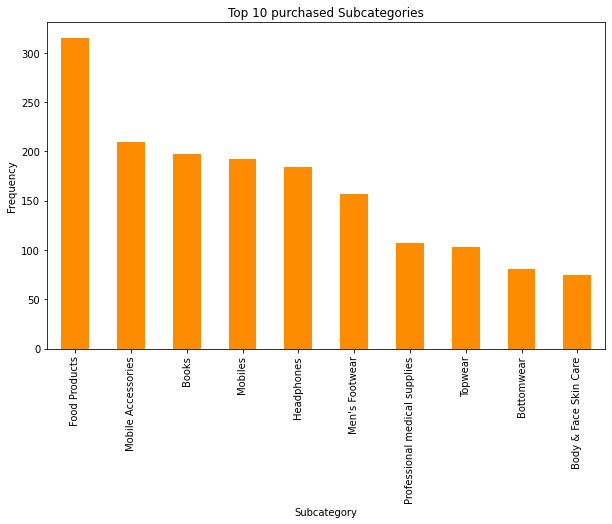

In [84]:
subcat = purchase_data.groupby('Subcategories').sum()['Quantity']
subcat = subcat.nlargest(10)
plt.figure(figsize=(10,6))
subcat.plot.bar(color='darkorange')
plt.title('Top 10 purchased Subcategories')
plt.xlabel('Subcategory')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

### Top 10 Final Price Subcategories

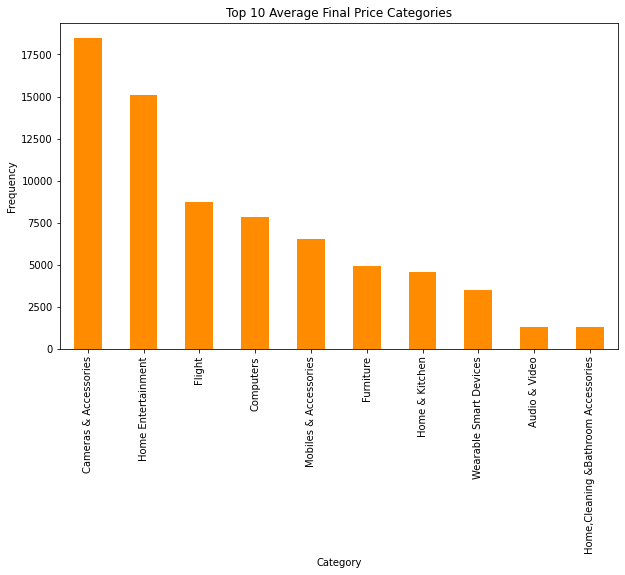

In [87]:
# Category wise
cat_fp = purchase_data.groupby('Categories').mean()['Final Price']
cat_fp = cat_fp.nlargest(10)
plt.figure(figsize=(10,6))
cat_fp.plot.bar(color='darkorange')
plt.title('Top 10 Average Final Price Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

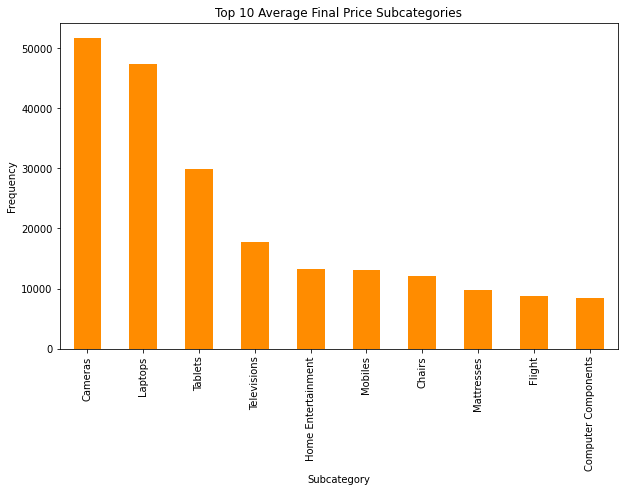

In [88]:
# Subcategory wise
subcat_fp = purchase_data.groupby('Subcategories').mean()['Final Price']
subcat_fp = subcat_fp.nlargest(10)
plt.figure(figsize=(10,6))
subcat_fp.plot.bar(color='darkorange')
plt.title('Top 10 Average Final Price Subcategories')
plt.xlabel('Subcategory')
plt.ylabel('Frequency')
plt.show()

# Top Brands in a Category based in ratings

In [28]:
gp_cat_brand = purchase_data.groupby(['Categories', 'Brand']).agg({'Ratings': 'mean'}).reset_index()
highest_ratings = (gp_cat_brand.groupby('Categories').apply(lambda x: x.nlargest(3, ['Ratings'])).reset_index(drop=True))
highest_ratings.loc[highest_ratings['Categories']=='Cameras & Accessories']

,Categories,Brand,Ratings
27,Cameras & Accessories,Nikon,4.5
28,Cameras & Accessories,SONY,4.5
29,Cameras & Accessories,OLECTRA,4.2


### Combination of Frequently-bought Categories

In [89]:
unique_invoice_ids = purchase_data['Invoice ID'].unique()

In [90]:
cat_combi = {}

for invoice_id in unique_invoice_ids:
  rows = purchase_data[purchase_data['Invoice ID'] == invoice_id]
  categories = rows['Categories'].unique().tolist()
  if len(categories) > 1:
    categories.sort()
    categories = str(categories)

    if categories in cat_combi.keys():
      cat_combi[categories] += 1
    else:
      cat_combi[categories] = 1

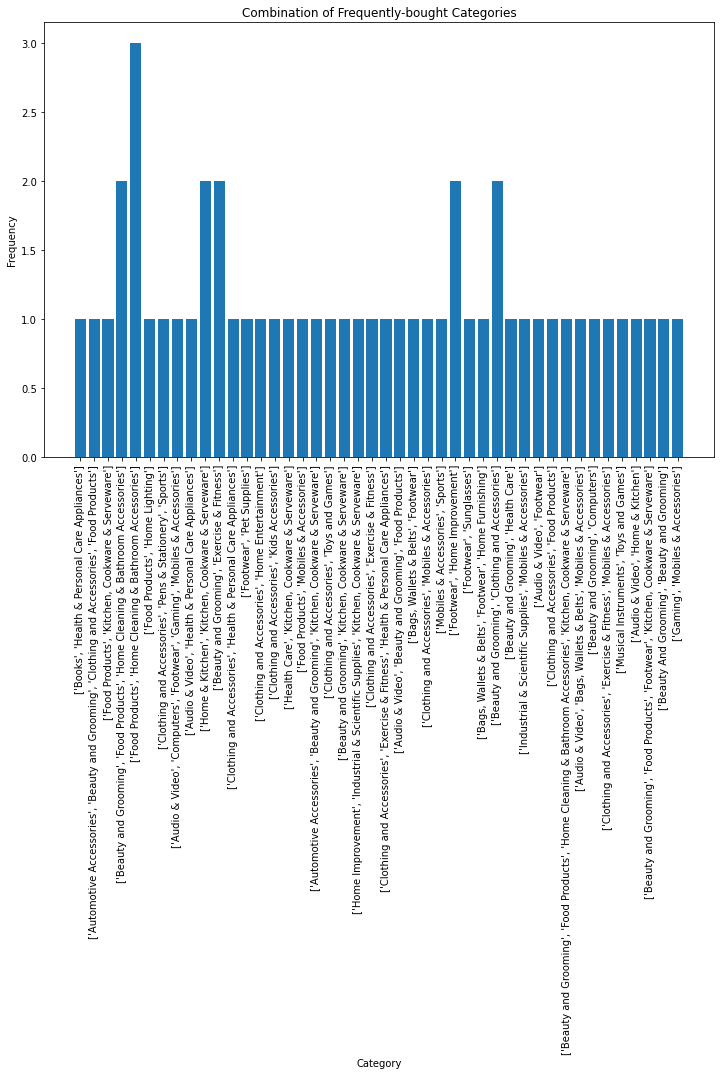

In [93]:
plt.figure(figsize=(12,8))
plt.bar(range(len(cat_combi)), list(cat_combi.values()), align='center')
plt.xticks(range(len(cat_combi)), list(cat_combi.keys()), rotation=90)
plt.title('Combination of Frequently-bought Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

In [95]:
top_10 = pd.Series(cat_combi).nlargest(10)
top_10

['Food Products', 'Home Cleaning & Bathroom Accessories']                                         3
['Beauty and Grooming', 'Food Products', 'Home Cleaning & Bathroom Accessories']                  2
['Home & Kitchen', 'Kitchen, Cookware & Serveware']                                               2
['Beauty and Grooming', 'Exercise & Fitness']                                                     2
['Footwear', 'Home Improvement']                                                                  2
['Beauty and Grooming', 'Clothing and Accessories']                                               2
['Books', 'Health & Personal Care Appliances']                                                    1
['Automotive Accessories', 'Beauty and Grooming', 'Clothing and Accessories', 'Food Products']    1
['Food Products', 'Kitchen, Cookware & Serveware']                                                1
['Food Products', 'Home Lighting']                                                                1
